In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

In [2]:
SNR = 3 # фиксируем отношение сигнал/шум
Eb = 1 # фиксируем энергию на бит
N0 = SNR / (10 ** (Eb / 10)) # вычисляем N0 по характеристикам канал
N0

2.3829847041728445

In [3]:
# по биту получает зашумлённое значение в канале с АБГШ
def modulate(cur_bit):
    return (2 * cur_bit - 1) + np.random.normal(0, math.sqrt(N0 / 2))

# по модуляции получает исходный бит
def demodulate(x):
    if x > 0:
        return 1
    else:
        return 0

# энтропия двоичного ансамбля
def h(x):
    if abs(x) < 1e-9 or abs(1 - x) < 1e-9:
        return 0
    else:
        return -x * math.log2(x) - (1 - x) * math.log2(1 - x)

In [4]:
deltas = list(np.linspace(0.01, 2, 1000))
cs = []

for delta in tqdm(deltas):
    retries = 100000 # чем больше повторов, тем плавнее будет график, и тем дольше вычисления
    wrong = 0 # количество ошибок
    erased = 0 # количество стираний
    
    for _ in range(retries):
        cur_bit = random.choice([0, 1]) # выбираем случайный бит
        modulation = modulate(cur_bit) # моделируем его отправку по каналу с АБГШ
        if abs(modulation) < delta: # если значение получилось слишком близким к нулю, стираем
            erased += 1
        else:
            # иначе расшифровываем и проверяем, правильно ли расшифровалось
            demodulated = demodulate(modulation)
            if (demodulated == 0 and cur_bit == 1) or (demodulated == 1 and cur_bit == 0):
                wrong += 1
    
    e = erased / retries # считаем эмпирическую вероятность стирания
    p = wrong / retries # считаем эмпирическую вероятность ошибки
    
    c = (1 - e) * (1 - h(p / (1 - e))) # вычисляем пропускую способность канала
    cs.append(c)

100%|██████████| 1000/1000 [07:20<00:00,  2.27it/s]


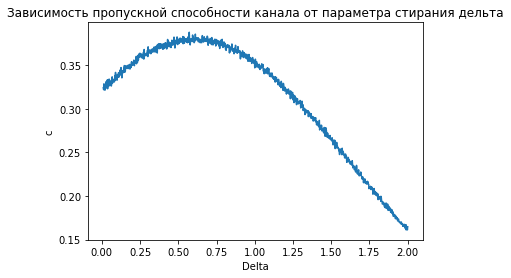

In [6]:
plt.plot(deltas, cs)
plt.xlabel('Delta')
plt.ylabel('c')
plt.title('Зависимость пропускной способности канала от параметра стирания дельта')
plt.show()